In [174]:
#pip install folium
#!pip install geopandas
#!pip install geojson

In [175]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson

In [176]:
with open("./datasets/data.pkl", "rb") as file1:
    data = pickle.load(file1)

In [177]:
data.head(10)

,id_hecho,nro_victimas,fecha,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direc_normalizada,comuna,longitud,latitud,participantes,acusado,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,1,2016-01-01,4,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,Piedra Buena Av.,"Fernandez De La Cruz, F., Gral. Av.","Piedra Buena Av. Y Fernandez De La Cruz, F., G...",comuna 8,-58.475340,-34.687570,Moto-Auto,Auto,Conductor,Moto,Masculino,19,2016-01-01
1,2016-0002,1,2016-01-02,1,Av Gral Paz Y Av De Los Corrales,Gral Paz,"Paz, Gral. Av.",De Los Corrales Av.,"Paz, Gral. Av. Y De Los Corrales Av.",comuna 9,-58.508775,-34.669777,Auto-Pasajeros,Pasajeros,Conductor,Auto,Masculino,70,2016-01-02
2,2016-0003,1,2016-01-03,7,Av Entre Rios 2034,Avenida,Entre Rios Av.,Sd,Entre Rios Av. 2034,comuna 1,-58.390403,-34.631894,Moto-Auto,Auto,Conductor,Moto,Masculino,30,2016-01-03
3,2016-0004,1,2016-01-10,0,Av Larrazabal Y Gral Villegas Conrado,Avenida,Larrazabal Av.,"Villegas, Conrado, Gral.","Larrazabal Av. Y Villegas, Conrado, Gral.",comuna 8,-58.465039,-34.680930,Moto-Sd,Sd,Conductor,Moto,Masculino,18,
4,2016-0005,1,2016-01-21,5,Av San Juan Y Presidente Luis Saenz Peña,Avenida,San Juan Av.,"Saenz Pe?A, Luis, Pres.","San Juan Av. Y Saenz Peã‘A, Luis, Pres.",comuna 1,-58.387183,-34.622466,Moto-Pasajeros,Pasajeros,Conductor,Moto,Masculino,29,2016-02-01
5,2016-0008,1,2016-01-24,18,Av 27 De Febrero Y Av Escalada,Avenida,27 De Febrero Av.,Escalada Av.,27 De Febrero Av. Y Escalada Av.,comuna 8,-58.444513,-34.684759,Moto-Objeto Fijo,Objeto Fijo,Conductor,Moto,Masculino,30,2016-01-24
6,2016-0009,1,2016-01-24,19,Nogoya Y Joaquin V. Gonzales,Calle,Nogoya,"Gonzalez, Joaquin V.","Nogoya Y Gonzalez, Joaquin V.",comuna 11,-58.500959,-34.608254,Moto-Auto,Auto,Pasajero_Acompañante,Moto,Masculino,29,2016-01-26
7,2016-0010,1,2016-01-29,15,Av General Paz Y Av De Los Corrales,Gral Paz,"Paz, Gral. Av.",De Los Corrales Av.,"Paz, Gral. Av. Y De Los Corrales Av.",comuna 9,-58.508775,-34.669777,Moto-Auto,Auto,Conductor,Moto,Masculino,18,2016-01-29
8,2016-0012,1,2016-02-08,1,Av Belgrano Y Bernardo De Irigoyen,Avenida,Belgrano Av.,"Irigoyen, Bernardo De","Belgrano Av. E Irigoyen, Bernardo De",comuna 1,-58.380486,-34.613039,Moto-Cargas,Cargas,Conductor,Moto,Masculino,22,2016-02-08
9,2016-0013,1,2016-02-10,11,Av Entre Rios 1366,Avenida,Entre Rios Av.,Sd,Entre Rios Av. 1366,comuna 1,-58.391149,-34.624774,Peaton-Auto,Auto,Peaton,Peaton,Masculino,16,2016-02-10


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_hecho             717 non-null    object 
 1   nro_victimas         717 non-null    int64  
 2   fecha                717 non-null    object 
 3   franja_horaria       716 non-null    Int64  
 4   lugar_hecho          717 non-null    object 
 5   tipo_calle           717 non-null    object 
 6   calle                717 non-null    object 
 7   cruce                717 non-null    object 
 8   direc_normalizada    717 non-null    object 
 9   comuna               717 non-null    object 
 10  longitud             704 non-null    float64
 11  latitud              704 non-null    float64
 12  participantes        717 non-null    object 
 13  acusado              717 non-null    object 
 14  rol                  717 non-null    object 
 15  victima              717 non-null    obj

In [179]:
data.describe()

,nro_victimas,franja_horaria,longitud,latitud,edad
count,717.000000,716.0,704.000000,704.000000,664.0
mean,1.061367,11.554469,-58.441664,-34.619700,42.167169
std,0.257024,6.700055,0.046397,0.035292,19.788034
min,1.000000,0.0,-58.529942,-34.705250,1.0
25%,1.000000,6.0,-58.476556,-34.643918,27.0
50%,1.000000,11.0,-58.444513,-34.622866,37.0
75%,1.000000,17.0,-58.401841,-34.597013,56.25
max,3.000000,23.0,-58.356082,-34.534654,95.0


In [180]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = data.select_dtypes(include=numerics)
len(numeric_df.columns)

5

### Porcentaje de valores nulos por columna

In [181]:
porcentaje_nulos = data.isna().sum().sort_values(ascending=False) / len(data)
porcentaje_nulos

edad                   0.073919
longitud               0.018131
latitud                0.018131
franja_horaria         0.001395
id_hecho               0.000000
sexo                   0.000000
victima                0.000000
rol                    0.000000
acusado                0.000000
participantes          0.000000
comuna                 0.000000
nro_victimas           0.000000
direc_normalizada      0.000000
cruce                  0.000000
calle                  0.000000
tipo_calle             0.000000
lugar_hecho            0.000000
fecha                  0.000000
fecha_fallecimiento    0.000000
dtype: float64

El procentaje de valores nulos por Columna no llegan al 30%

<Axes: >

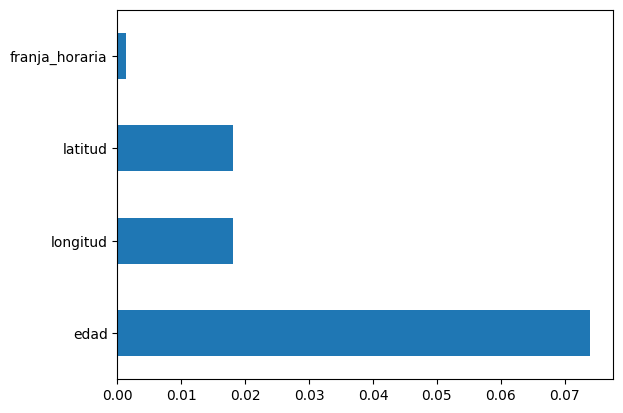

In [182]:
porcentaje_nulos[porcentaje_nulos != 0].plot(kind='barh')

In [183]:
data.columns

Index(['id_hecho', 'nro_victimas', 'fecha', 'franja_horaria', 'lugar_hecho',
       'tipo_calle', 'calle', 'cruce', 'direc_normalizada', 'comuna',
       'longitud', 'latitud', 'participantes', 'acusado', 'rol', 'victima',
       'sexo', 'edad', 'fecha_fallecimiento'],
      dtype='object')

In [184]:
print(f"Numero de filas duplicadas = {data.duplicated().sum()}")

Numero de filas duplicadas = 0


In [185]:
# Realizamos una descripcion estadistica de tipo texto
tipo_texto = data.select_dtypes(include=['object']).columns
df_texto = data[tipo_texto]
df_texto.describe()

,id_hecho,fecha,lugar_hecho,tipo_calle,calle,cruce,direc_normalizada,comuna,participantes,acusado,rol,victima,sexo,fecha_fallecimiento
count,717,717,717,717,717,717,717,717,717,717,717,717,717,717
unique,696,598,681,4,280,318,636,16,41,10,5,8,3,562
top,2017-0035,2018-12-18,Av 27 De Febrero Y Av Escalada,Avenida,"Paz, Gral. Av.",Sd,Sd,comuna 1,Peaton-Pasajeros,Auto,Conductor,Moto,Masculino,
freq,3,3,4,442,61,177,9,93,105,210,330,303,545,69


### Valores Atípicos/Extremos u Outliers

In [186]:
df_numerico = data.select_dtypes(include=['number']) 

In [187]:
df_numerico

,nro_victimas,franja_horaria,longitud,latitud,edad
0,1,4,-58.475340,-34.687570,19
1,1,1,-58.508775,-34.669777,70
2,1,7,-58.390403,-34.631894,30
3,1,0,-58.465039,-34.680930,18
4,1,5,-58.387183,-34.622466,29
...,...,...,...,...,...
712,1,17,-58.433538,-34.645616,18
713,1,1,-58.467398,-34.651178,43
714,1,0,-58.472934,-34.619847,27
715,1,10,-58.470668,-34.650217,60


In [188]:
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1 
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (df_numerico < limite_inf) | (df_numerico > limite_sup)
valores_atipicos = df_numerico[mascaras]
valores_atipicos = valores_atipicos[["nro_victimas","edad"]]
valores_atipicos.nro_victimas[valores_atipicos.nro_victimas.notnull()].head(10)

29     2.0
30     2.0
98     2.0
99     2.0
163    2.0
164    2.0
173    3.0
174    3.0
175    3.0
176    2.0
Name: nro_victimas, dtype: float64

### Matriz de Correlación

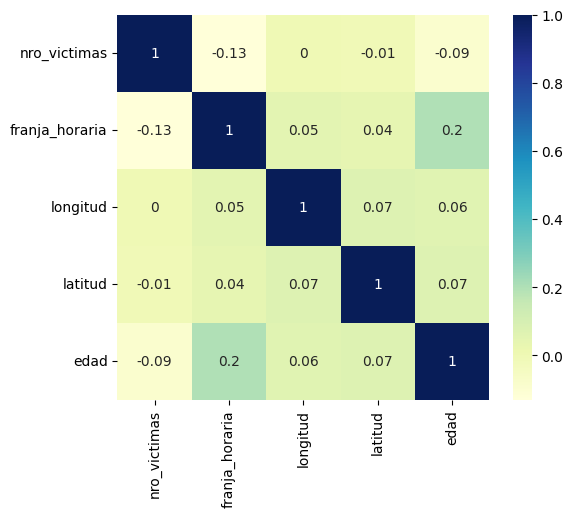

In [189]:
# Generamos un mapa de calor con las correlaciones de los datos
df_numerico = data.select_dtypes(include=['number']) 
corr = df_numerico.corr().round(2)
plt.figure(figsize=(6,5))
#sns.heatmap(data=corr, annot=True)
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

## Análisis exploratorio y visualización

Columnas que analizaremos:

1. Comuna
2. Franja horaria
3. Latitud, Longitud

In [190]:
data.comuna.unique()

array(['comuna 8', 'comuna 9', 'comuna 1', 'comuna 11', 'comuna 15',
       'comuna 4', 'comuna 7', 'comuna 12', 'comuna 3', 'comuna 13',
       'comuna 14', 'comuna 10', 'comuna 6', 'comuna 2', 'comuna 5', 'SD'],
      dtype=object)

In [191]:
comunas_by_accident = data.comuna.value_counts().sort_values()
comunas_by_accident

comuna
SD            2
comuna 6     22
comuna 5     22
comuna 2     25
comuna 10    30
comuna 11    33
comuna 14    37
comuna 12    39
comuna 13    40
comuna 15    45
comuna 3     46
comuna 7     62
comuna 8     67
comuna 9     75
comuna 4     79
comuna 1     93
Name: count, dtype: int64

<Axes: ylabel='comuna'>

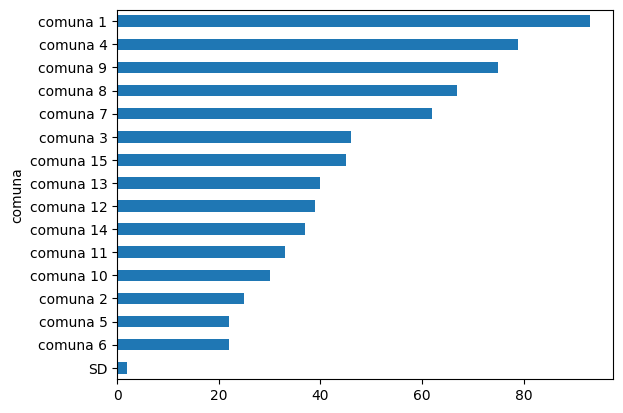

In [192]:
comunas_by_accident[:17].plot(kind='barh')

In [193]:
data.franja_horaria.unique()

<IntegerArray>
[   4,    1,    7,    0,    5,   18,   19,   15,   11,   22,   16,    9,   23,
    6,   10,   17,   12,    8,   20,   21,   14,    3,    2,   13, <NA>]
Length: 25, dtype: Int64

In [194]:
franja_accidente = data.franja_horaria.value_counts().sort_values()
franja_accidente

franja_horaria
13    17
2     18
0     23
15    25
1     25
3     26
20    26
4     27
23    28
11    29
21    29
16    30
19    30
10    31
8     31
22    31
17    31
12    32
18    33
14    33
9     37
5     39
6     42
7     43
Name: count, dtype: Int64

<Axes: ylabel='franja_horaria'>

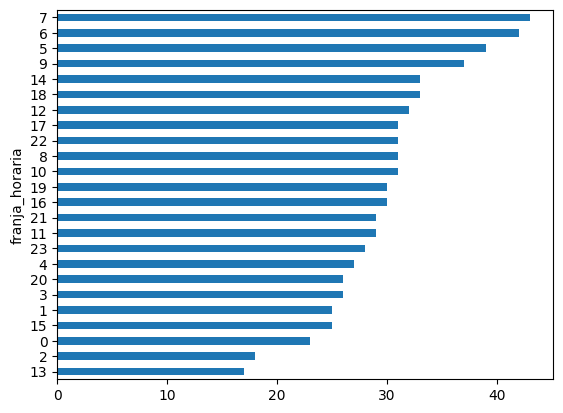

In [195]:
franja_accidente[:25].plot(kind='barh')

Latitud y longitud

In [196]:
data.latitud

0     -34.687570
1     -34.669777
2     -34.631894
3     -34.680930
4     -34.622466
         ...    
712   -34.645616
713   -34.651178
714   -34.619847
715   -34.650217
716   -34.586796
Name: latitud, Length: 717, dtype: float64

In [197]:
data.longitud

0     -58.475340
1     -58.508775
2     -58.390403
3     -58.465039
4     -58.387183
         ...    
712   -58.433538
713   -58.467398
714   -58.472934
715   -58.470668
716   -58.379762
Name: longitud, Length: 717, dtype: float64

In [198]:
dataLocalizacion = data[data['latitud'].notnull()]
dataLocalizacion = dataLocalizacion[dataLocalizacion['longitud'].notnull()]

lat_lon_pairs = list(zip(list(dataLocalizacion.latitud), list(dataLocalizacion.longitud)))

In [199]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)


In [200]:
map

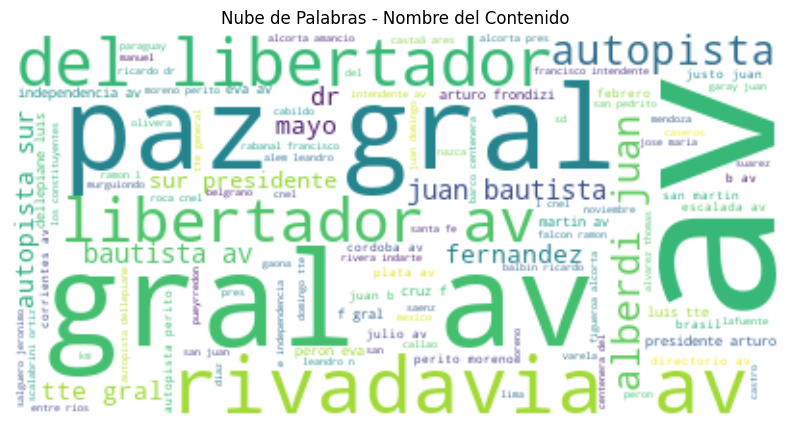

In [201]:
# Generamos una nube de palabras de la columna 'app_name'
title_words = ' '.join(data['direc_normalizada'].astype(str))
title_words = title_words.lower()
stopwords = ["de", "y","el", "la", "&", ":", "para", "por", "en",  "con"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Nombre del Contenido')
plt.show()

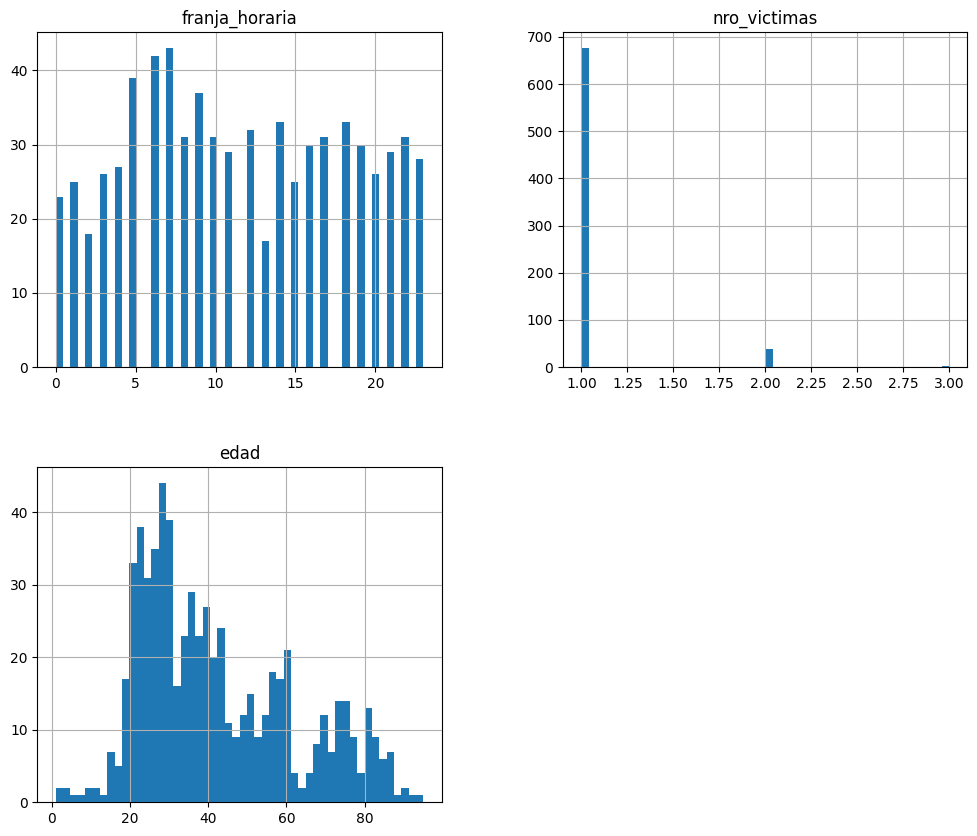

In [202]:
dataHisto=data[['franja_horaria','nro_victimas','edad']]
dataHisto.hist(bins = 50, figsize= (12,10))
plt.show()

Hallamos el valor de localización a partir de la latitud y longitud

In [204]:
#Antes de comenzar a usar geopandas, se define el sistema de referencia de coordenadas (CRS)
#GeoDataFrame son coordenadas en un espacio arbitrario
#CRS le dice a Python cómo se relacionan esas coordenadas con los lugares de la Tierra.
#Se necesita decirle a Python el sistema de referencia de coordenadas.

crs={'init':'epsg:4326'}


In [ ]:
#Se define la geometría
geometry=[Point(xy) for xy in zip(data["longitud"], data["latitud"])]

In [ ]:
# Se tiene sistema de referencia y la geometría en su lugar, finalmente carguemos nuestros datos
geodata=gpd.GeoDataFrame(data,crs=crs, geometry=geometry)

<Axes: >

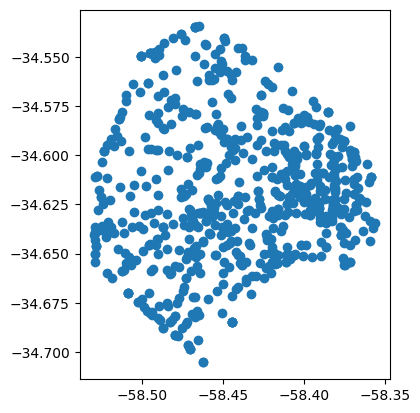

In [205]:
#Se muestran los puntos de datos que se asignaron en función de la latitud y la longitud 
geodata.plot()

In [207]:
#Ahora se mapearan los puntos en un mapa real 
#Necesitamos usar un archivo Shapefile de la Ciudad de Buenos Aires
shapefile = gpd.read_file(r'./comunas/comunas_wgs84.shp')

Text(40.02858004940542, 0.5, 'Latitud')

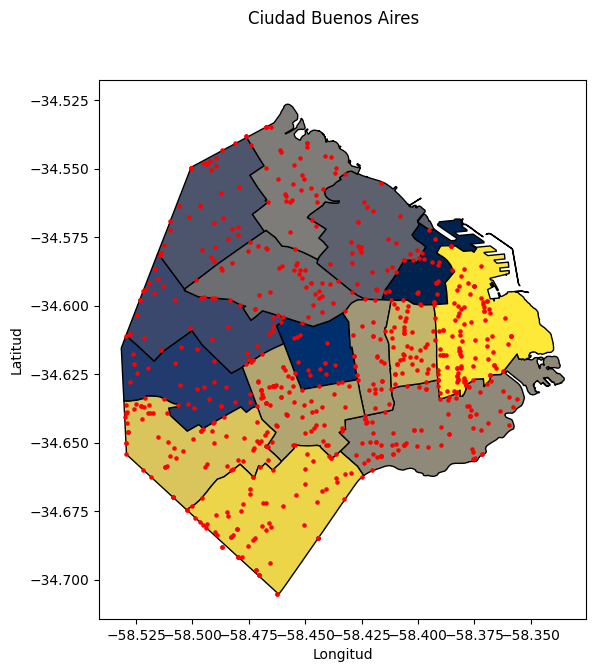

In [212]:
#Ahora podemos trazar el mapa de Buenos Aires y luego agregar los puntos de datos
fig, ax = plt.subplots(figsize=(7,7))

shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="cividis")

geodata.plot(ax=ax, color='red', markersize=5);

fig.suptitle('Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')